<a href="https://colab.research.google.com/github/JayCh0711/JayCh0711/blob/main/Customer_Segmentation_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#Show all columns on output
pd.set_option('display.max_columns', 999)

Data Exploration

In [22]:
df = pd.read_excel('/content/online_retail_II.xlsx', sheet_name = 0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [24]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [25]:
df.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [26]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [27]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [28]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [29]:
df["Invoice"].str.replace("[0-9]","", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [30]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [31]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [32]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


Data Cleaning

In [33]:
cleaned_df = df.copy()

In [34]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") ==  True
)
cleaned_df = cleaned_df[mask]

In [35]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [36]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True
    | (cleaned_df["StockCode"].str.contains("^PADS$") == True)
    )
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [37]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

/tmp/ipython-input-1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [38]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406323.00,406323,406323.00,406323.00
mean,13.62,2010-07-01 10:14:46.649094656,2.99,15373.66
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [39]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [40]:
cleaned_df =  cleaned_df[cleaned_df["Price"] > 0.0]

In [41]:
cleaned_df["Price"].min()

0.03

In [42]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406295.00,406295,406295.00,406295.00
mean,13.62,2010-07-01 10:18:05.997415424,2.99,15373.75
min,1.00,2009-12-01 07:45:00,0.03,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [43]:
len(cleaned_df)/len(df)

0.7732162805612596

Dropped 23% of records

Feature Engineering

In [44]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df

/tmp/ipython-input-3407437207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [45]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
  .agg(
      MonetaryValue = ("SalesLineTotal", "sum"),
      Frequency = ("Invoice", "nunique"),
      LastInvoiceDate = ("InvoiceDate", "max"),
      FirstInvoiceDate = ("InvoiceDate", "min")
  )
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00,2010-03-02 13:08:00
1,12347.00,1323.32,2,2010-12-07 14:57:00,2010-10-31 14:20:00
2,12348.00,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00,2010-04-29 13:20:00
4,12351.00,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00


In [46]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
max_invoice_date
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,2010-03-02 13:08:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2010-10-31 14:20:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,2010-04-29 13:20:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,10


{'whiskers': [<matplotlib.lines.Line2D at 0x7ed324ce7080>,
 'caps': [<matplotlib.lines.Line2D at 0x7ed324ce7680>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ed324ce6d80>],
 'medians': [<matplotlib.lines.Line2D at 0x7ed324ce7cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ed324ce7fe0>],
 'means': []}

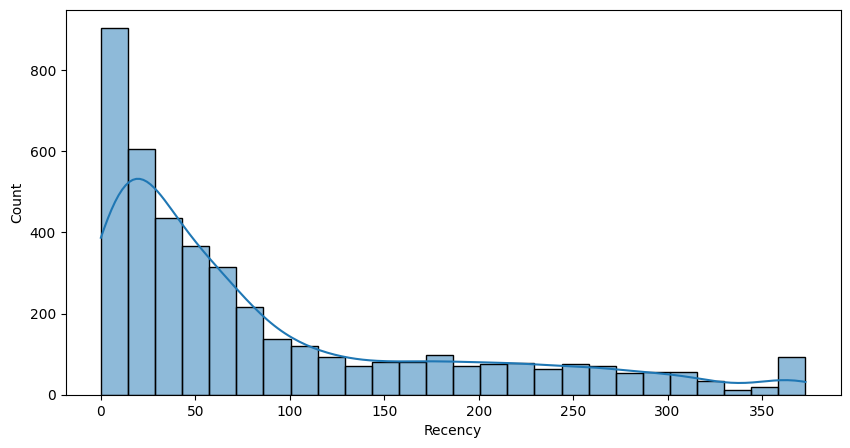

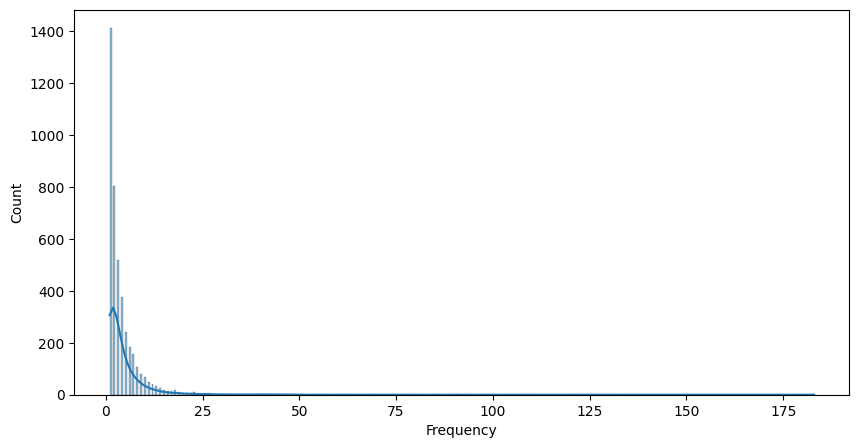

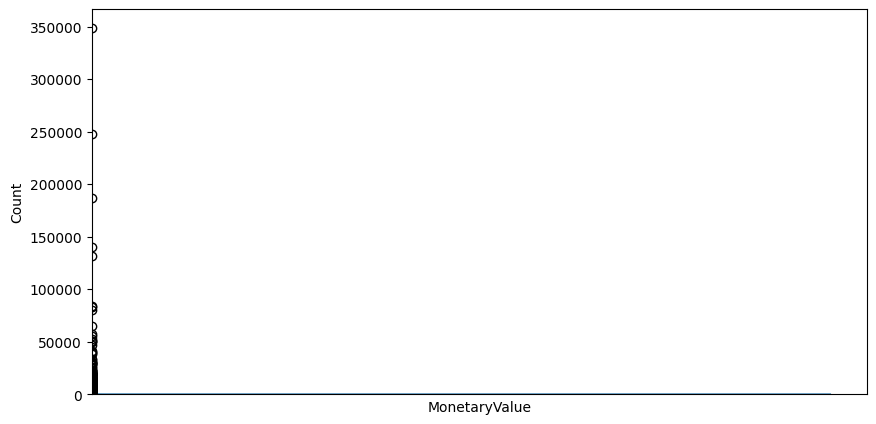

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=aggregated_df, x="Recency", kde=True)

plt.figure(figsize=(10,5))
sns.histplot(data=aggregated_df, x="Frequency", kde=True)

plt.figure(figsize=(10,5))
sns.histplot(data=aggregated_df, x="MonetaryValue", kde=True)

plt.boxplot(data=aggregated_df, x="Recency")
plt.boxplot(data=aggregated_df, x="Frequency")
plt.boxplot(data=aggregated_df, x="MonetaryValue")

In [50]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetory_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"]> (M_Q3+1.5*M_IQR)) | (aggregated_df["MonetaryValue"]< (M_Q1-1.5*M_IQR))].copy()
monetory_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency
count,423.00,423.00,423.00,423,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,2010-01-16 14:38:25.390070784,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,2009-12-01 09:06:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,2009-12-04 12:36:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,2009-12-13 11:41:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,2010-02-08 12:53:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,2010-11-16 10:05:00,364.00
std,1728.66,25830.85,19.73,NaN,NaN,51.54


In [51]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = M_Q3 - M_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]> (M_Q3+1.5*M_IQR)) | (aggregated_df["Frequency"]< (M_Q1-1.5*M_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency
count,0.00,0.00,0.00,0,0,0.00
mean,NaN,NaN,NaN,NaT,NaT,NaN
min,NaN,NaN,NaN,NaT,NaT,NaN
25%,NaN,NaN,NaN,NaT,NaT,NaN
50%,NaN,NaN,NaN,NaT,NaT,NaN
75%,NaN,NaN,NaN,NaT,NaT,NaN
max,NaN,NaN,NaN,NaT,NaT,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetory_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency
count,3862.00,3862.00,3862.00,3862,3862,3862.00
mean,15384.60,910.88,3.03,2010-09-04 11:39:34.458829824,2010-05-10 13:40:46.763335168,96.07
min,12346.00,1.55,1.00,2009-12-01 10:49:00,2009-12-01 07:45:00,0.00
25%,13920.25,283.43,1.00,2010-07-13 13:19:45,2010-01-27 20:52:30,22.00
50%,15398.00,599.54,2.00,2010-10-13 14:43:30,2010-04-22 10:04:00,57.00
75%,16863.75,1309.61,4.00,2010-11-17 16:55:45,2010-09-02 16:57:45,149.00
max,18287.00,3788.21,62.00,2010-12-09 20:01:00,2010-12-09 16:08:00,373.00
std,1694.57,843.66,2.76,NaN,NaN,97.89


<Axes: xlabel='MonetaryValue', ylabel='Count'>

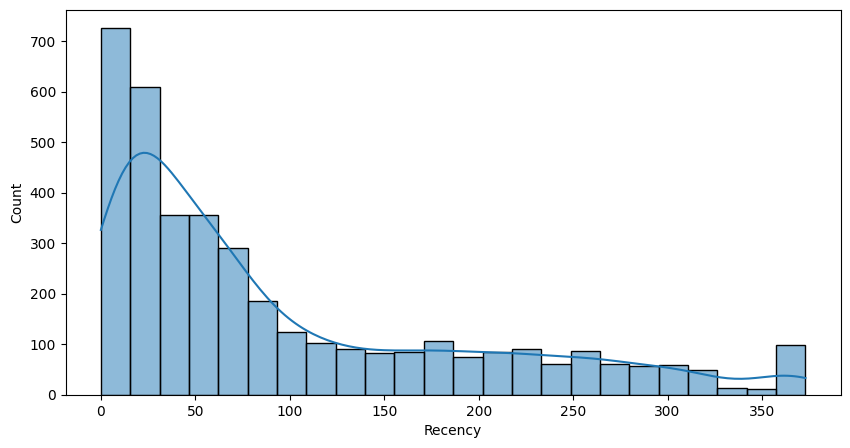

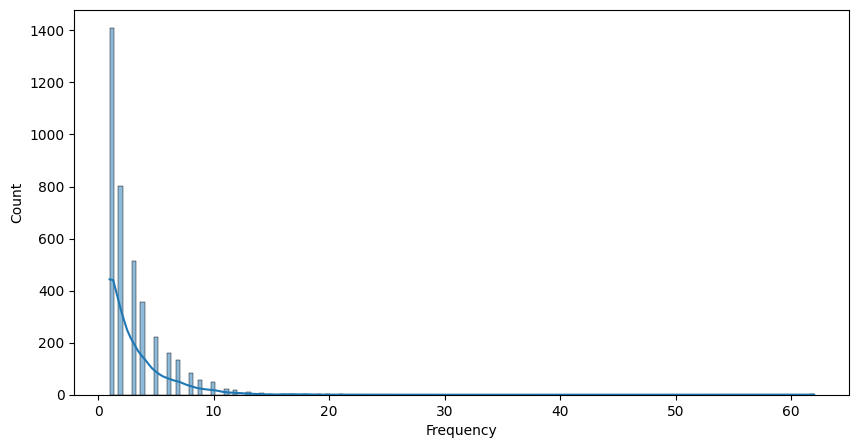

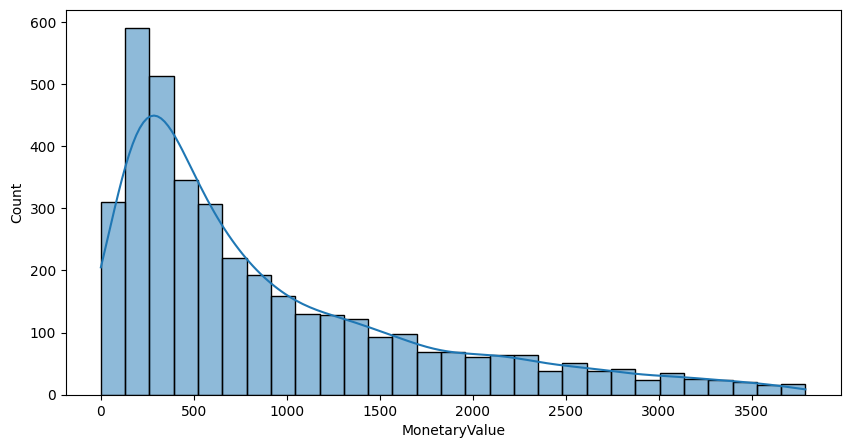

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(data=non_outliers_df, x="Recency", kde=True)

plt.figure(figsize=(10,5))
sns.histplot(data=non_outliers_df, x="Frequency", kde=True)

plt.figure(figsize=(10,5))
sns.histplot(data=non_outliers_df, x="MonetaryValue", kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

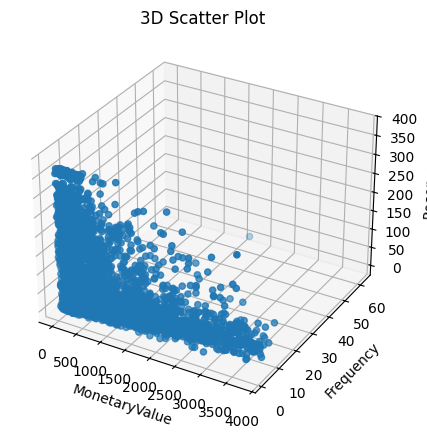

In [54]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot")
plt.show

Applying StandardScaler

In [55]:
scaler =StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.8790411 , -0.37301391,  0.69409768],
       [ 0.48893154, -0.37301391, -0.96110778],
       [-0.81763431, -0.73496861, -0.23567823],
       ...,
       [-0.63289233, -0.73496861,  2.0325663 ],
       [ 0.39778157, -0.37301391,  0.15257985],
       [ 1.64166032,  0.35089549, -0.80784802]])

In [58]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=["MonetaryValue", "Frequency", "Recency"])
scaled_data

array([[-0.8790411 , -0.37301391,  0.69409768],
       [ 0.48893154, -0.37301391, -0.96110778],
       [-0.81763431, -0.73496861, -0.23567823],
       ...,
       [-0.63289233, -0.73496861,  2.0325663 ],
       [ 0.39778157, -0.37301391,  0.15257985],
       [ 1.64166032,  0.35089549, -0.80784802]])

<function matplotlib.pyplot.show(close=None, block=None)>

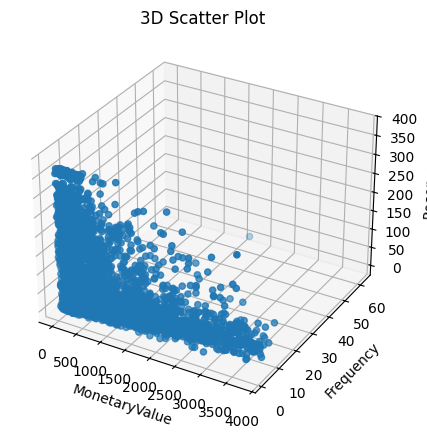

In [60]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot")
plt.show

K-Means Clustering

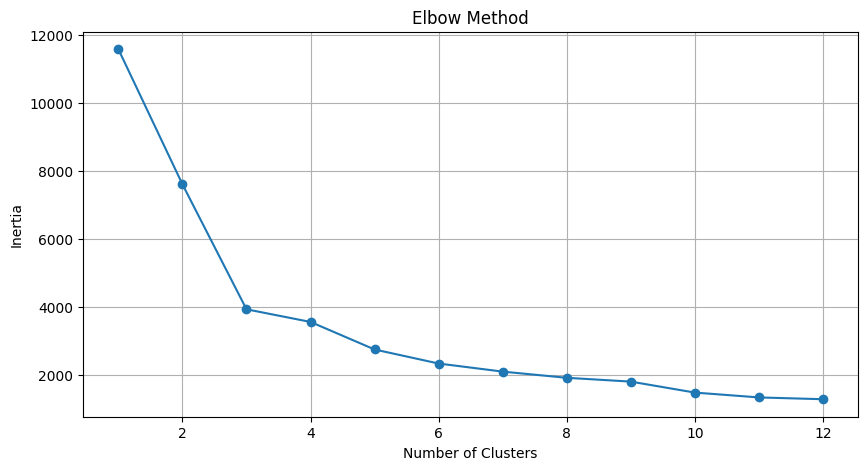

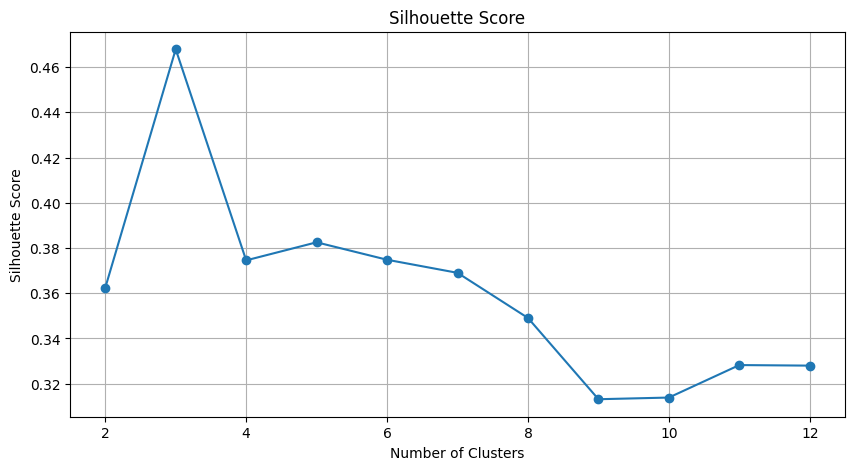

In [63]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(1, max_k+1)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
  cluster_labels = kmeans.fit_predict(scaled_data_df)

  if k >= 2:
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
  else:
    silhouette_scores.append(None) # Append None or handle as appropriate for k=1

  inertia.append(kmeans.inertia_) #avg distance of points and centroids

plt.figure(figsize=(10,5))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_values[1:], silhouette_scores[1:], marker="o") # Plot from k=2 onwards
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.grid(True)
plt.show()

In [65]:
from sklearn import cluster
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([3, 1, 1, ..., 0, 1, 2], dtype=int32)

In [67]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

/tmp/ipython-input-1071184375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,2010-03-02 13:08:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2010-10-31 14:20:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,73,1
3,12349.00,2221.14,2,2010-10-28 08:23:00,2010-04-29 13:20:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,2010-02-19 17:16:00,17,1
4281,18284.00,411.68,1,2010-10-04 11:33:00,2010-10-04 11:33:00,66,1
4282,18285.00,377.00,1,2010-02-17 10:24:00,2010-02-17 10:24:00,295,0
4283,18286.00,1246.43,2,2010-08-20 11:57:00,2009-12-16 10:45:00,111,1


In [68]:
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}

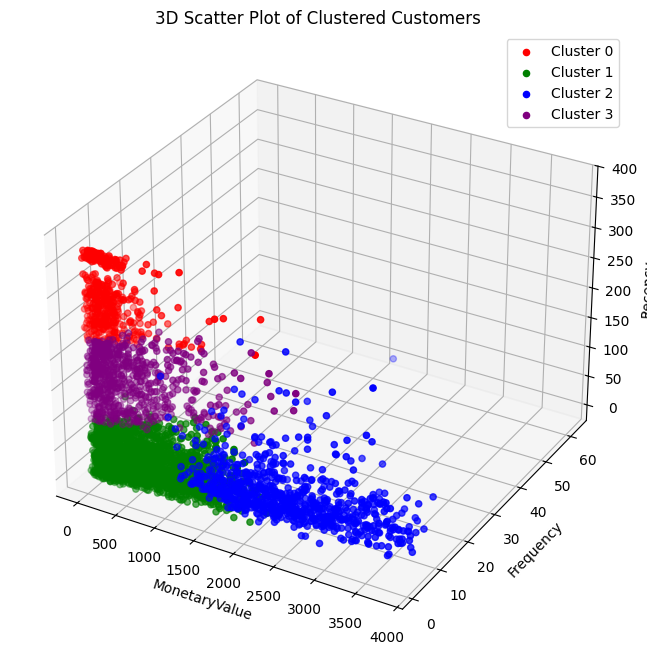

In [69]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection="3d")

for cluster_id, color in cluster_colors.items():
    cluster_data = non_outliers_df[non_outliers_df["Cluster"] == cluster_id]
    ax.scatter(cluster_data["MonetaryValue"], cluster_data["Frequency"], cluster_data["Recency"], color=color, label=f'Cluster {cluster_id}')

ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Clustered Customers")
ax.legend()
plt.show()

0 = blue = retain
1 = orange = re engage
2 = green = nurture
3 = red = reward

In [74]:
overlap_indices = monetory_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices
monetory_only_outliers = monetory_outliers_df[~monetory_outliers_df.index.isin(overlap_indices)]
frequency_outliers_outliers = frequency_outliers_df[~frequency_outliers_df.index.isin(overlap_indices)]
monetary_and_frequency_outliers = pd.concat([monetory_only_outliers, frequency_outliers_outliers])
monetary_and_frequency_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,2010-02-15 12:05:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,2010-05-23 15:21:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,2010-06-30 08:30:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,2010-01-15 09:04:00,8
...,...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,2009-12-04 16:52:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,2010-03-05 10:05:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,2010-01-10 12:13:00,41
4253,18251.00,21964.14,8,2010-09-20 13:26:00,2009-12-22 12:01:00,80


Visualization

cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [76]:
outlier_clusters_df = monetory_outliers_df.copy()
outlier_clusters_df['Cluster'] = -1 # Assign a unique cluster label for outliers, e.g., -1 for PAMPER

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,2010-03-02 13:08:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2010-10-31 14:20:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,73,1
3,12349.00,2221.14,2,2010-10-28 08:23:00,2010-04-29 13:20:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,2009-12-04 16:52:00,0,-1
4237,18226.00,6650.83,15,2010-11-26 15:51:00,2010-03-05 10:05:00,13,-1
4241,18231.00,4791.80,23,2010-10-29 14:17:00,2010-01-10 12:13:00,41,-1
4253,18251.00,21964.14,8,2010-09-20 13:26:00,2009-12-22 12:01:00,80,-1


In [78]:
cluster_id_to_name_map = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER", # This was assigned to monetary_outliers_df in the previous step
    -2: "UPSELL", # Not currently used based on existing code
    -3: "DELIGHT" # Not currently used based on existing code
}
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_id_to_name_map)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,2010-03-02 13:08:00,164,3,REWARD
1,12347.00,1323.32,2,2010-12-07 14:57:00,2010-10-31 14:20:00,2,1,RE-ENGAGE
2,12348.00,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,73,1,RE-ENGAGE
3,12349.00,2221.14,2,2010-10-28 08:23:00,2010-04-29 13:20:00,42,2,NURTURE
4,12351.00,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,10,1,RE-ENGAGE
...,...,...,...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,2009-12-04 16:52:00,0,-1,PAMPER
4237,18226.00,6650.83,15,2010-11-26 15:51:00,2010-03-05 10:05:00,13,-1,PAMPER
4241,18231.00,4791.80,23,2010-10-29 14:17:00,2010-01-10 12:13:00,41,-1,PAMPER
4253,18251.00,21964.14,8,2010-09-20 13:26:00,2009-12-22 12:01:00,80,-1,PAMPER


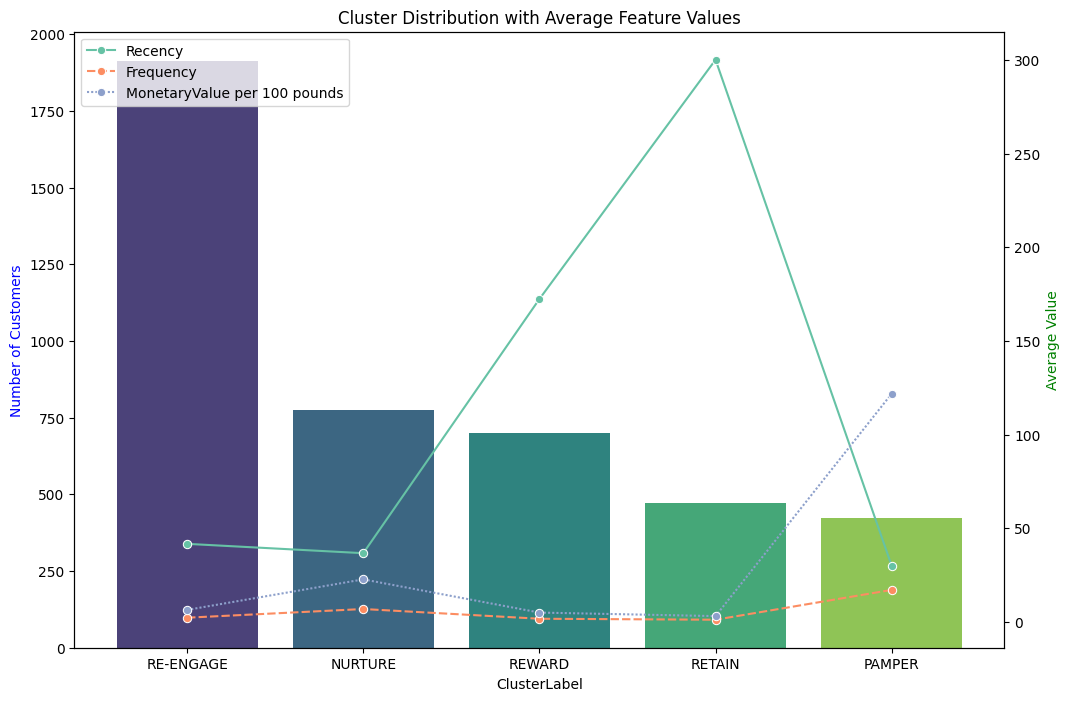

In [79]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()